In [97]:
# create class
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


class european_option:
    ''' 
    attributes S0 (initial underlying level), K (option strike price), t (pricing date), M (maturity date), r (constant
    risk-free short rate), sigma (volatility), d (continuous dividend rate), CP (call or put), and an
    optional C (market price of the option)
    '''
    
    def __init__(self, S0, K, t, M, r, sigma, d, type, mkt_price ) -> None:
        self.S0 = S0
        self.K = K                  # strike
        self.t = t                  # pricing date
        self.M = M                  # maturity date
        self.r = r                  # risk free rate
        self.sigma = sigma
        self.d = d                  # continuius dividend rate
        self.type = type            # call or put
        self.mkt_price = mkt_price

        # Calculate d1 and d2 here so that they do not need to be called in methods.
        d1 = (np.log(self.S0 / self.K) + (self.r - self.d + 0.5 * self.sigma ** 2) * (self.M - self.t)) / (self.sigma * np.sqrt(self.M - self.t))
        self.d1 = d1
        d2 = d1 - self.sigma * np.sqrt(self.M - self.t)
        self.d2 = d2

    '''
    methods value (return present value of the option), imp_vol (implied volatility given market price), delta 
    (option delta), gamma (option gamma), vega (option vega), theta (option theta), rho (option rho).
    '''
    # method for present value
    def value(self):
        # d1 and d2 are already calculated in __init__ constructor
        if self.type == 'call':
            return self.S0 * norm.cdf(self.d1) - self.K * np.exp(-self.r * (self.M - self.t)) * norm.cdf(self.d2)
        elif self.type == 'put':
            return self.K * np.exp(-self.r * (self.M - self.t)) * norm.cdf(-self.d2) - self.S0 * norm.cdf(-self.d1)
        else:
            print ('type must be call or put')

    # method for implied volatility
    def imp_vol(self):
        if self.mkt_price == None:
            print ('market price is not defined')
        else:
            return np.sqrt(np.log(self.mkt_price / (self.S0 * norm.cdf(self.d1))) / (2 * (self.r - self.d)))

    # method for option delta
    def delta(self):
        if self.type == 'call':
            return norm.cdf(self.d1)
        elif self.type == 'put':
            return norm.cdf(self.d1) - 1
        else:
            print ('type must be call or put')

    # method for option gamma
    def gamma(self):
        return norm.pdf(self.d1) / (self.S0 * self.sigma * np.sqrt(self.M - self.t))

    # method for option vega
    def vega(self):
        return self.S0 * norm.pdf(self.d1) * np.sqrt(self.M - self.t)

    # method for option theta
    def theta(self):
        theta =  -self.S0 * norm.pdf(self.d1) * self.sigma / (2 * np.sqrt(self.M - self.t)) - \
            self.r * self.K * np.exp(-self.r * (self.M - self.t)) * norm.cdf(self.d2)   
            # backslash above for readability, \ is not division
        return theta
    
    # method for option rho
    def rho(self):
        return self.K * self.M * np.exp(-self.r * (self.M - self.t)) * norm.cdf(self.d2)


'''
Write Python code that creates a class called risk_reversal with 1) attributes S0 (initial underlying level), 
K1, K2 (strike prices K1 < K2), t (pricing date), M (maturity date), r (constant risk-free short rate), 
div (constant dividend rate), sigma (volatility), and 2) methods value (return present value of the risk reversal) 
and plot_payoff (plots net payoff diagram and present value for the range of underlying prices [0.9 ∗K1,1.1 ∗K2]).
'''

class risk_reversal:
    def __init__(self, S0, K1, K2, t, M, r, d, sigma) -> None:
        self.S0 = S0
        self.K1 = K1
        self.K2 = K2
        self.t = t
        self.M = M
        self.r = r
        self.d = d
        self.sigma = sigma

        if self.K2 < self.K1:
            raise ValueError ('K2 must be greater than K1')

    def value(self):
        # present value of the risk reversal
        # sell out of the money put at K1
        # buy out of the money call at K2
        # RR_value

        # I can not figure out this lambda function

        d1 = (np.log(self.S0 / self.K1) + (self.r - self.d + 0.5 * self.sigma ** 2) * (self.M - self.t)) / (self.sigma * np.sqrt(self.M - self.t))
        # d1 = lambda x: np.log(self.S0 / x) + (self.r - self.d + 0.5 * self.sigma ** 2) * (self.M - self.t) / (self.sigma * np.sqrt(self.M - self.t))
        d2 = d1 - self.sigma * np.sqrt(self.M - self.t)
        # d2 = d1 - self.sigma * np.sqrt(self.M - self.t)       # does this need a lambda?
        call_value = self.S0 * norm.cdf(d1) - self.K1 * np.exp(-self.r * (self.M - self.t)) * norm.cdf(d2)
        d1 = (np.log(self.S0 / self.K2) + (self.r - self.d + 0.5 * self.sigma ** 2) * (self.M - self.t)) / (self.sigma * np.sqrt(self.M - self.t))
        d2 = d1 - self.sigma * np.sqrt(self.M - self.t)
        put_value = self.K2 * np.exp(-self.r * (self.M - self.t)) * norm.cdf(-d2) - self.S0 * norm.cdf(-d1)
        return call_value - put_value

    def plot_payoff(self):
        for s in range(int(.9*self.K1), int(1.1*self.K2), 5):
            self.S0 = s
            # print ('S0, Value:', self.S0, self.value())
            plt.plot(self.S0, self.value(), 'ro')
            plt.xlabel('Underlying Price')
            plt.ylabel('Net Payoff')
            plt.title('Net Payoff Diagram')
            
        plt.show()








In [98]:
testing = risk_reversal(S0=150, K1=100, K2=200, t=10, M=50, r=0.05, d=0, sigma=0.2)

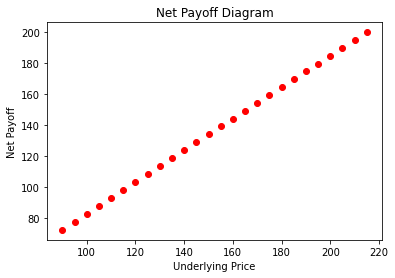

In [99]:
testing.plot_payoff()